#####   
# MST: Minimal (cost) Spanning Tree
 - **Kruskal**
 - **Prim's**

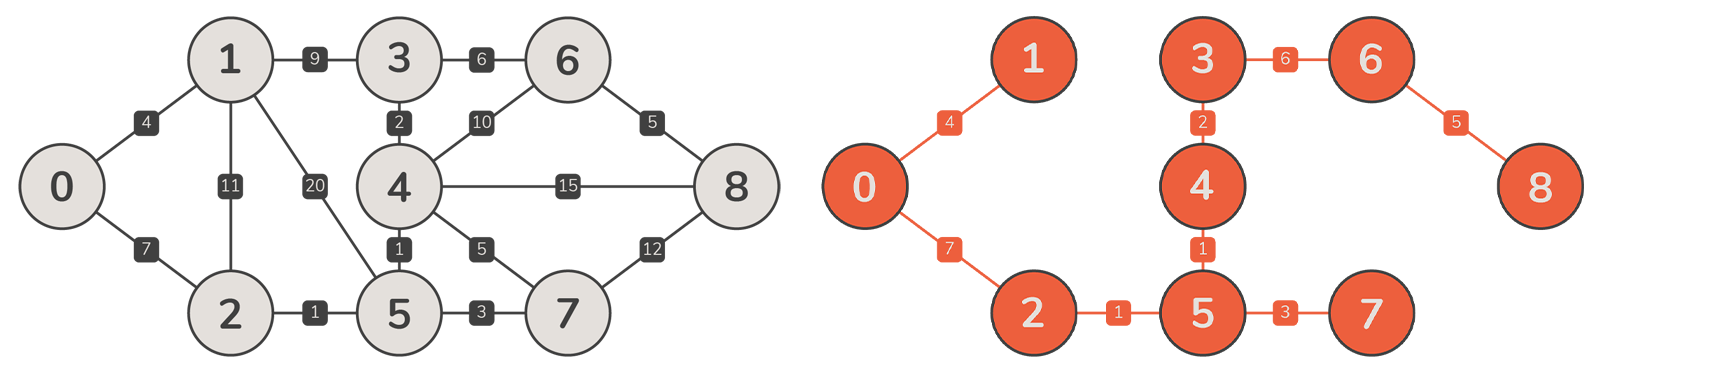

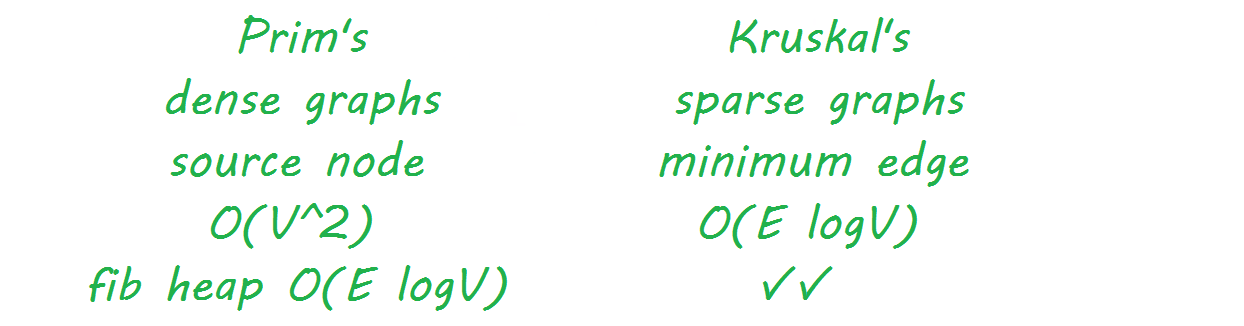

## Kruskal
 - **O( E logV )**
 - **finds lowest-cost & shortest tree**
 - **unilateral / bilateral weighted graph**

In [1]:
def kruskalMST(G):
    
    import pandas as pd
    INF = float('inf')
    
    V       = len( G )
    parent  = [i for i in range(V)]  
    
    E       = 0
    A, B, C = [], [], []
    
    
    def find(i):
        while parent[i] != i:
            i = parent[i]
        return i

    def union(i, j):
        a = find(i)
        b = find(j)
        parent[a] = b
    
    
    while ( E < V-1 ): 
        
        a = -1
        b = -1
        c = INF
        
        for i in range(V):
            for j in range(V):
                if find(i) != find(j) and G[i][j] < c:
                    a = i
                    b = j
                    c = G[a][b]
                    
        A.append(a); B.append(b); C.append(c)
        union(a, b) 
        E = E + 1     
        
    DF = pd.DataFrame([A,B,C]).T
    DF.columns = ['From','To','Cost']
    DF['From'] = DF['From'].astype(int)
    DF[ 'To' ] = DF[ 'To' ].astype(int) 
    
    print("Minimum cost = {}".format( sum(C) ))
    return DF

## Prim's
 - **O( V^2 )**
 - **Prim's algorithm can be improved using Fibonacci Heaps (cf Cormen) to O( E logV )**
 - **finds lowest-cost & shortest tree**
 - **unilateral / bilateral weighted graph**

In [2]:
def primsMST( G ):
    
    import pandas as pd
    INF = float('inf')
    
    V                = len( G )
    E                = 0
    visited_nodes    = [False] * V
    visited_nodes[0] = True
    
    A,B,C = [],[],[]
    
    #print("Edge : Weight\n")
    while ( E < V-1 ):
    
        minimum = INF
        a = 0
        b = 0
        for m in range(V):
            if visited_nodes[m]:
                for n in range(V):
                    if ((not visited_nodes[n]) and G[m][n]):  
                        # not in selected and there is an edge
                        if minimum > G[m][n]:
                            minimum = G[m][n]
                            a = m
                            b = n
                            c = G[a][b]
        A.append(a); B.append(b); C.append(c)
        #print(str(a) + "-" + str(b) + ":" + str(c))
        visited_nodes[b] = True
        E = E + 1
        
    DF = pd.DataFrame([A,B,C]).T
    DF.columns = ['From','To','Cost']
    DF['From'] = DF['From'].astype(int)
    DF[ 'To' ] = DF[ 'To' ].astype(int) 
    
    print("Minimum cost = {}".format( sum(C) ))
    return DF

#   
##   Example

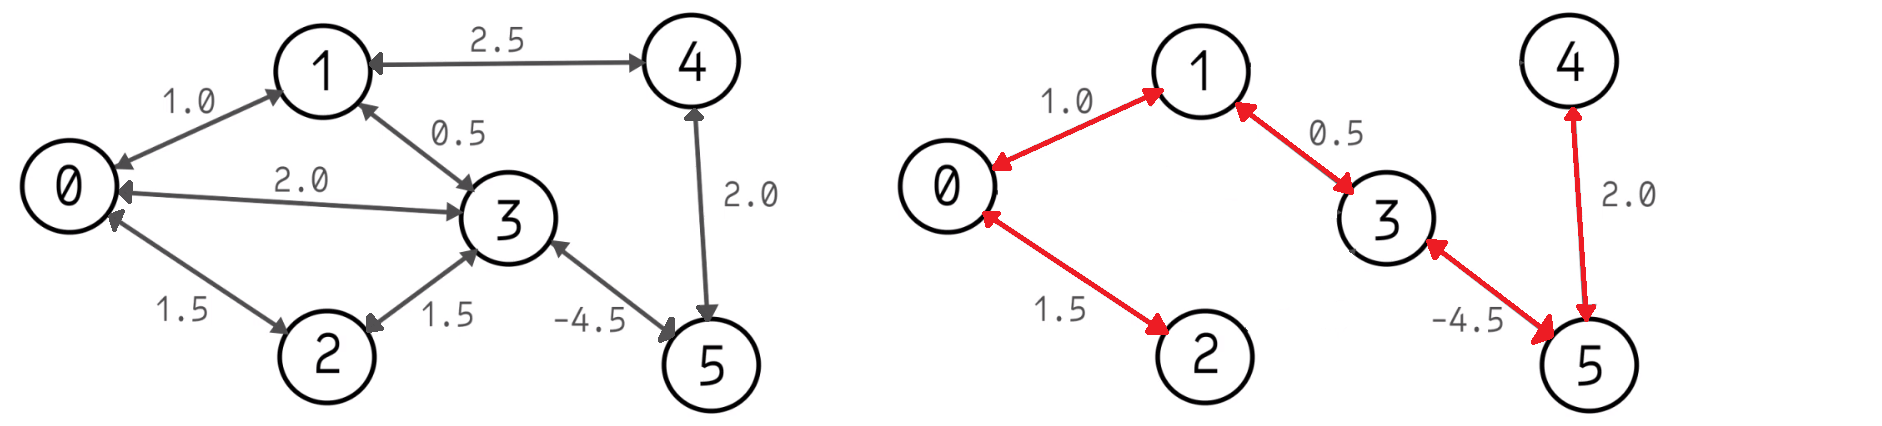

In [3]:
INF = float('inf')

# Adjacency Matrix
G   = [ [INF, 1.0, 1.5, 2.0, INF, INF] ,
        [1.0, INF, INF, 0.5, 2.5, INF] ,
        [1.5, INF, INF, 1.5, INF, INF] ,
        [2.0, 0.5, 1.5, INF, INF,-4.5] ,
        [INF, 2.5, INF, INF, INF, 2.0] ,
        [INF, INF, INF,-4.5, 2.0, INF] ]

In [4]:
kruskalMST( G )

Minimum cost = 0.5


From  To  Cost
0     3   5  -4.5
1     1   3   0.5
2     0   1   1.0
3     0   2   1.5
4     4   5   2.0

In [5]:
primsMST( G )

Minimum cost = 0.5


From  To  Cost
0     0   1   1.0
1     1   3   0.5
2     3   5  -4.5
3     0   2   1.5
4     5   4   2.0

#####   

#####   